In [12]:
train_time = 1
param_num = 450340
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 
comm_time = param_num * 4 / comm_bandwidth
fwdgrad_time_per_round = train_time*15 + comm_time*15
fedsgd_time_per_round = train_time*8*15 + comm_time*15*2
fedavg_time_per_round = train_time*8*15 + comm_time*1*2
fwdgrad_time_per_round /= 60
fedsgd_time_per_round /= 60
fedavg_time_per_round /= 60
method_round_time = [fedavg_time_per_round,fedsgd_time_per_round,fwdgrad_time_per_round]
method_round_time = {"fedavg":fedavg_time_per_round,"fedsgd":fedsgd_time_per_round,"fedFwd":fwdgrad_time_per_round}
dataset = "agnews"

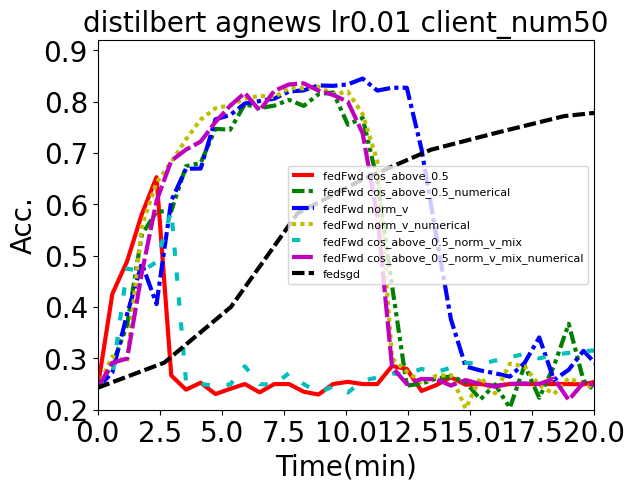

In [17]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
client_num_list = [50]
method_list = ["fedFwd"]
model_list = ["distilbert"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["0.01"]
v_type_list = ["cos_above_0.5", "cos_above_0.5_numerical", "norm_v", "norm_v_numerical","cos_above_0.5_norm_v_mix","cos_above_0.5_norm_v_mix_numerical"]
eval_frequence = 1
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for lr in learning_rate_list:
        for method_id,method in enumerate(method_list):
            acc_lists = []
            for client_num in client_num_list:
                for i,v_type in enumerate(v_type_list):
                    acc = []
                    with open(f"{method}_{model}_{dataset}_lr{lr}_client_num_{client_num}_{v_type}.log","r") as f:
                        log = f.readlines()
                        for l in log:
                            if "'acc':" in l:
                                acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                            # if len(acc)>200:
                            #     break
                    plt.plot([t*method_round_time[method]*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[i],label=f"{method} {v_type}",linewidth=lw)
        acc = []
        with open(f"../distilbert_agnews/fedsgd_{model}_{dataset}_lr{lr}_client_num_{client_num}.log","r") as f:
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                # if len(acc)>200:
                #     break
        plt.plot([t*method_round_time["fedsgd"]*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i+1], color=colors[i+1],label=f"fedsgd",linewidth=lw)

        plt.xlabel("Time(min)",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,20)
        plt.yticks(size = 20)
        plt.ylim(0.2,0.92)
        plt.legend(fontsize=8)
        plt.title(f"{model} {dataset} lr{lr} client_num{client_num}",fontsize=20)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")


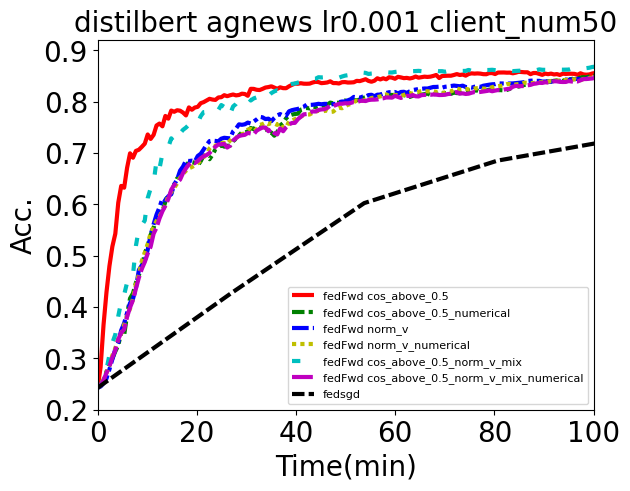

In [16]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
client_num_list = [50]
method_list = ["fedFwd"]
model_list = ["distilbert"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["0.001"]
v_type_list = ["cos_above_0.5", "cos_above_0.5_numerical", "norm_v", "norm_v_numerical","cos_above_0.5_norm_v_mix","cos_above_0.5_norm_v_mix_numerical"]
eval_frequence = 1
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for lr in learning_rate_list:
        for method_id,method in enumerate(method_list):
            acc_lists = []
            for client_num in client_num_list:
                for i,v_type in enumerate(v_type_list):
                    acc = []
                    with open(f"{method}_{model}_{dataset}_lr{lr}_client_num_{client_num}_{v_type}.log","r") as f:
                        log = f.readlines()
                        for l in log:
                            if "'acc':" in l:
                                acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                            # if len(acc)>200:
                            #     break
                    plt.plot([t*method_round_time[method]*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[i],label=f"{method} {v_type}",linewidth=lw)
        acc = []
        with open(f"../../time_to_acc_diff_client_num/distilbert_agnews/fedsgd_{model}_{dataset}_lr{lr}_client_num_{client_num}.log","r") as f:
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                # if len(acc)>200:
                #     break
        plt.plot([t*method_round_time["fedsgd"]*10 for t in range(len(acc))], acc, linestyle=linestyle[i+1], color=colors[i+1],label=f"fedsgd",linewidth=lw)


        plt.xlabel("Time(min)",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,100)
        plt.yticks(size = 20)
        plt.ylim(0.2,0.92)
        plt.legend(fontsize=8)
        plt.title(f"{model} {dataset} lr{lr} client_num{client_num}",fontsize=20)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")


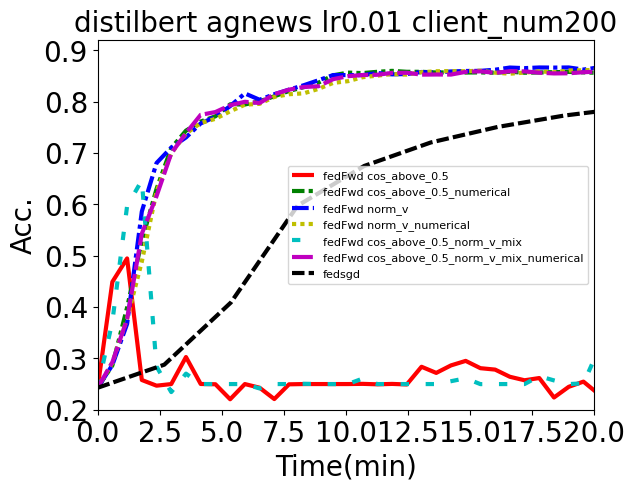

In [19]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
client_num_list = [200]
method_list = ["fedFwd"]
model_list = ["distilbert"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["0.01"]
v_type_list = ["cos_above_0.5", "cos_above_0.5_numerical", "norm_v", "norm_v_numerical","cos_above_0.5_norm_v_mix","cos_above_0.5_norm_v_mix_numerical"]
eval_frequence = 1
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for lr in learning_rate_list:
        for method_id,method in enumerate(method_list):
            acc_lists = []
            for client_num in client_num_list:
                for i,v_type in enumerate(v_type_list):
                    acc = []
                    with open(f"{method}_{model}_{dataset}_lr{lr}_client_num_{client_num}_{v_type}.log","r") as f:
                        log = f.readlines()
                        for l in log:
                            if "'acc':" in l:
                                acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                            # if len(acc)>200:
                            #     break
                    plt.plot([t*method_round_time[method]*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[i],label=f"{method} {v_type}",linewidth=lw)
        acc = []
        with open(f"../distilbert_agnews/fedsgd_{model}_{dataset}_lr{lr}_client_num_{client_num}.log","r") as f:
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                # if len(acc)>200:
                #     break
        plt.plot([t*method_round_time["fedsgd"]*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i+1], color=colors[i+1],label=f"fedsgd",linewidth=lw)

        plt.xlabel("Time(min)",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,20)
        plt.yticks(size = 20)
        plt.ylim(0.2,0.92)
        plt.legend(fontsize=8)
        plt.title(f"{model} {dataset} lr{lr} client_num{client_num}",fontsize=20)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")


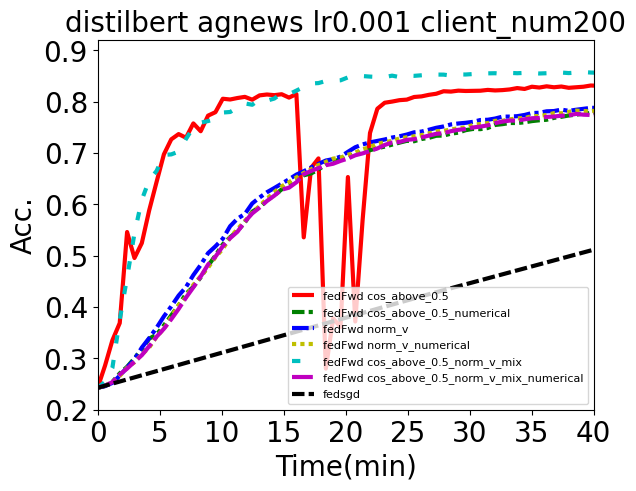

In [24]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
client_num_list = [200]
method_list = ["fedFwd"]
model_list = ["distilbert"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["0.001"]
v_type_list = ["cos_above_0.5", "cos_above_0.5_numerical", "norm_v", "norm_v_numerical","cos_above_0.5_norm_v_mix","cos_above_0.5_norm_v_mix_numerical"]
eval_frequence = 1
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for lr in learning_rate_list:
        for method_id,method in enumerate(method_list):
            acc_lists = []
            for client_num in client_num_list:
                for i,v_type in enumerate(v_type_list):
                    acc = []
                    with open(f"{method}_{model}_{dataset}_lr{lr}_client_num_{client_num}_{v_type}.log","r") as f:
                        log = f.readlines()
                        for l in log:
                            if "'acc':" in l:
                                acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                            # if len(acc)>200:
                            #     break
                    plt.plot([t*method_round_time[method]*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[i],label=f"{method} {v_type}",linewidth=lw)
        acc = []
        with open(f"../../time_to_acc_diff_client_num/distilbert_agnews/fedsgd_{model}_{dataset}_lr{lr}_client_num_{client_num}.log","r") as f:
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                # if len(acc)>200:
                #     break
        plt.plot([t*method_round_time["fedsgd"]*10 for t in range(len(acc))], acc, linestyle=linestyle[i+1], color=colors[i+1],label=f"fedsgd",linewidth=lw)

        plt.xlabel("Time(min)",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,40)
        plt.yticks(size = 20)
        plt.ylim(0.2,0.92)
        plt.legend(fontsize=8)
        plt.title(f"{model} {dataset} lr{lr} client_num{client_num}",fontsize=20)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")
